# Value Iteration
## Gambler's Problem

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [2]:
# Declaring initial CONSTANTS
GOAL = 100
PH = 0.4
DISCOUNT = 1.0
GOAL_REACHED_REWARD = 1.0

In [3]:
# defining all of the states
states = np.arange(0, GOAL + 1, dtype=np.int32)

# defining actions for a given state
def actions(state):
    return np.arange(0, min(state, GOAL - state) + 1)

Expected return is the implementation of $q_\pi(s, a)$.<br>
Review:
$$
\begin{align}
    q_\pi(s, a) &= \mathbb{E}_\pi\big[r + \gamma v_\pi(s^\prime)\big]\\
    &= \sum_{a}\pi(a|s)\sum_{s^\prime, r} p(s^\prime, r | s, a) \big[r + \gamma v_\pi(s^\prime)\big]\\
    &= \sum_{s^\prime, r} p(s^\prime, r | s, a) \big[r + \gamma v_\pi(s^\prime)\big] & \text{Given we have deterministic actions}
\end{align}
$$

In [4]:
def expected_return(state, action, state_value):
    returns = 0.0
    # if it is heads
    new_state = state + action
    reward = GOAL_REACHED_REWARD if new_state == GOAL else 0.0
    returns += PH * (reward + DISCOUNT * state_value[new_state])

    # if it is tails
    new_state = state - action
    reward = 0
    returns += (1 - PH) * (reward + DISCOUNT * state_value[new_state])

    return returns

In [5]:
def value_iteration(theta=1e-16, verbose=True):
    state_value = np.zeros((GOAL + 1), dtype=np.float32)
    sweep_hist = []
    while True:
        old_state_value = state_value.copy()
        for state in states[1:GOAL]:
            state_value[state] = np.max([expected_return(state, action, state_value) for action in actions(state)])
        delta = np.abs(state_value - old_state_value).max()
        sweep_hist.append(state_value.copy())
        if verbose:
            print(f'\rSweep {len(sweep_hist):<3}, delta is {delta:0.3e}', end='')
        if delta < theta:
            policy = np.zeros((GOAL + 1,),dtype=np.int32)
            for state in states[1:GOAL]:
                action_returns = []
                for action in actions(state):
                    action_returns.append(expected_return(state, action, state_value))
                policy[state] = np.argmax(np.round(action_returns[1:], 5)) + 1
            return state_value, policy, sweep_hist

In [6]:
state_value, policy, sweep_history = value_iteration()

Sweep 18 , delta is 0.000e+00

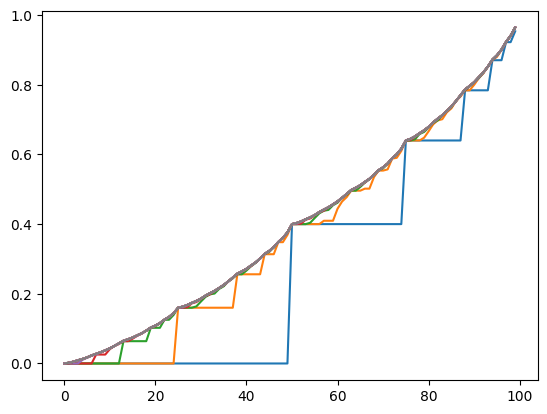

In [7]:
for i, hist in enumerate(sweep_history):
    plt.plot(range(hist.size - 1), hist[:-1], label=f'sweep{i}')

<BarContainer object of 101 artists>

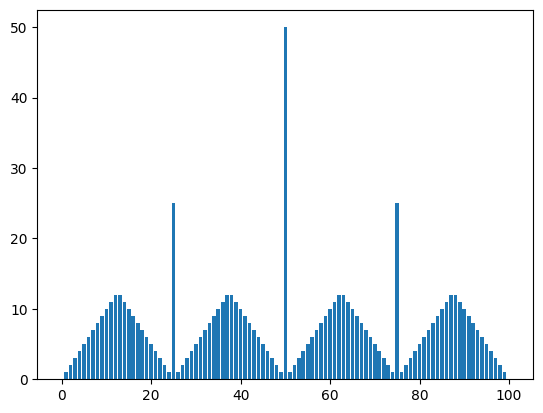

In [8]:
plt.bar(range(policy.size), policy)

- Explaination is still required